In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar 
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

In [3]:
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.COLA-RSMAS-CCSM4/.MONTHLY/.sst/dods'

In [8]:
ds =xr.open_dataset(url, decode_times=False)

In [9]:
ds

<xarray.Dataset>
Dimensions:  (S: 502, M: 10, X: 360, Y: 181, L: 12)
Coordinates:
  * S        (S) float32 264.0 265.0 266.0 267.0 ... 762.0 763.0 764.0 765.0
  * M        (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
Data variables:
    sst      (S, L, M, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

In [6]:
variable_names = ds.variables
print(variable_names)

Frozen({'S': <xarray.IndexVariable 'S' (S: 502)>
array([264., 265., 266., ..., 763., 764., 765.], dtype=float32)
Attributes:
    defaultvalue:   765.0
    standard_name:  forecast_reference_time
    long_name:      Forecast Start Time
    pointwidth:     0
    calendar:       360
    expires:        1698799320
    gridtype:       0
    units:          months since 1960-01-01, 'M': <xarray.IndexVariable 'M' (M: 10)>
array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)
Attributes:
    standard_name:  realization
    long_name:      Ensemble Member
    pointwidth:     1.0
    gridtype:       0
    units:          unitless, 'X': <xarray.IndexVariable 'X' (X: 360)>
array([  0.,   1.,   2., ..., 357., 358., 359.], dtype=float32)
Attributes:
    standard_name:  longitude
    pointwidth:     1.0
    gridtype:       1
    units:          degree_east, 'Y': <xarray.IndexVariable 'Y' (Y: 181)>
array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80., -79.,
      

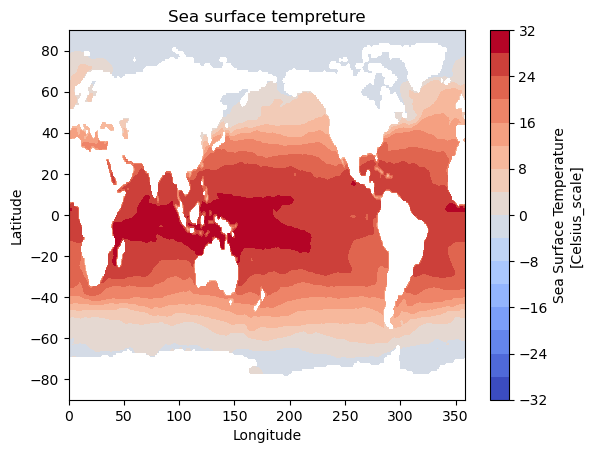

In [66]:
sst_slice = ds['sst'][0, 0, 0, :, :]
contour = sst_slice.plot.contourf(levels=20, cmap='coolwarm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sea surface tempreture')
plt.show()

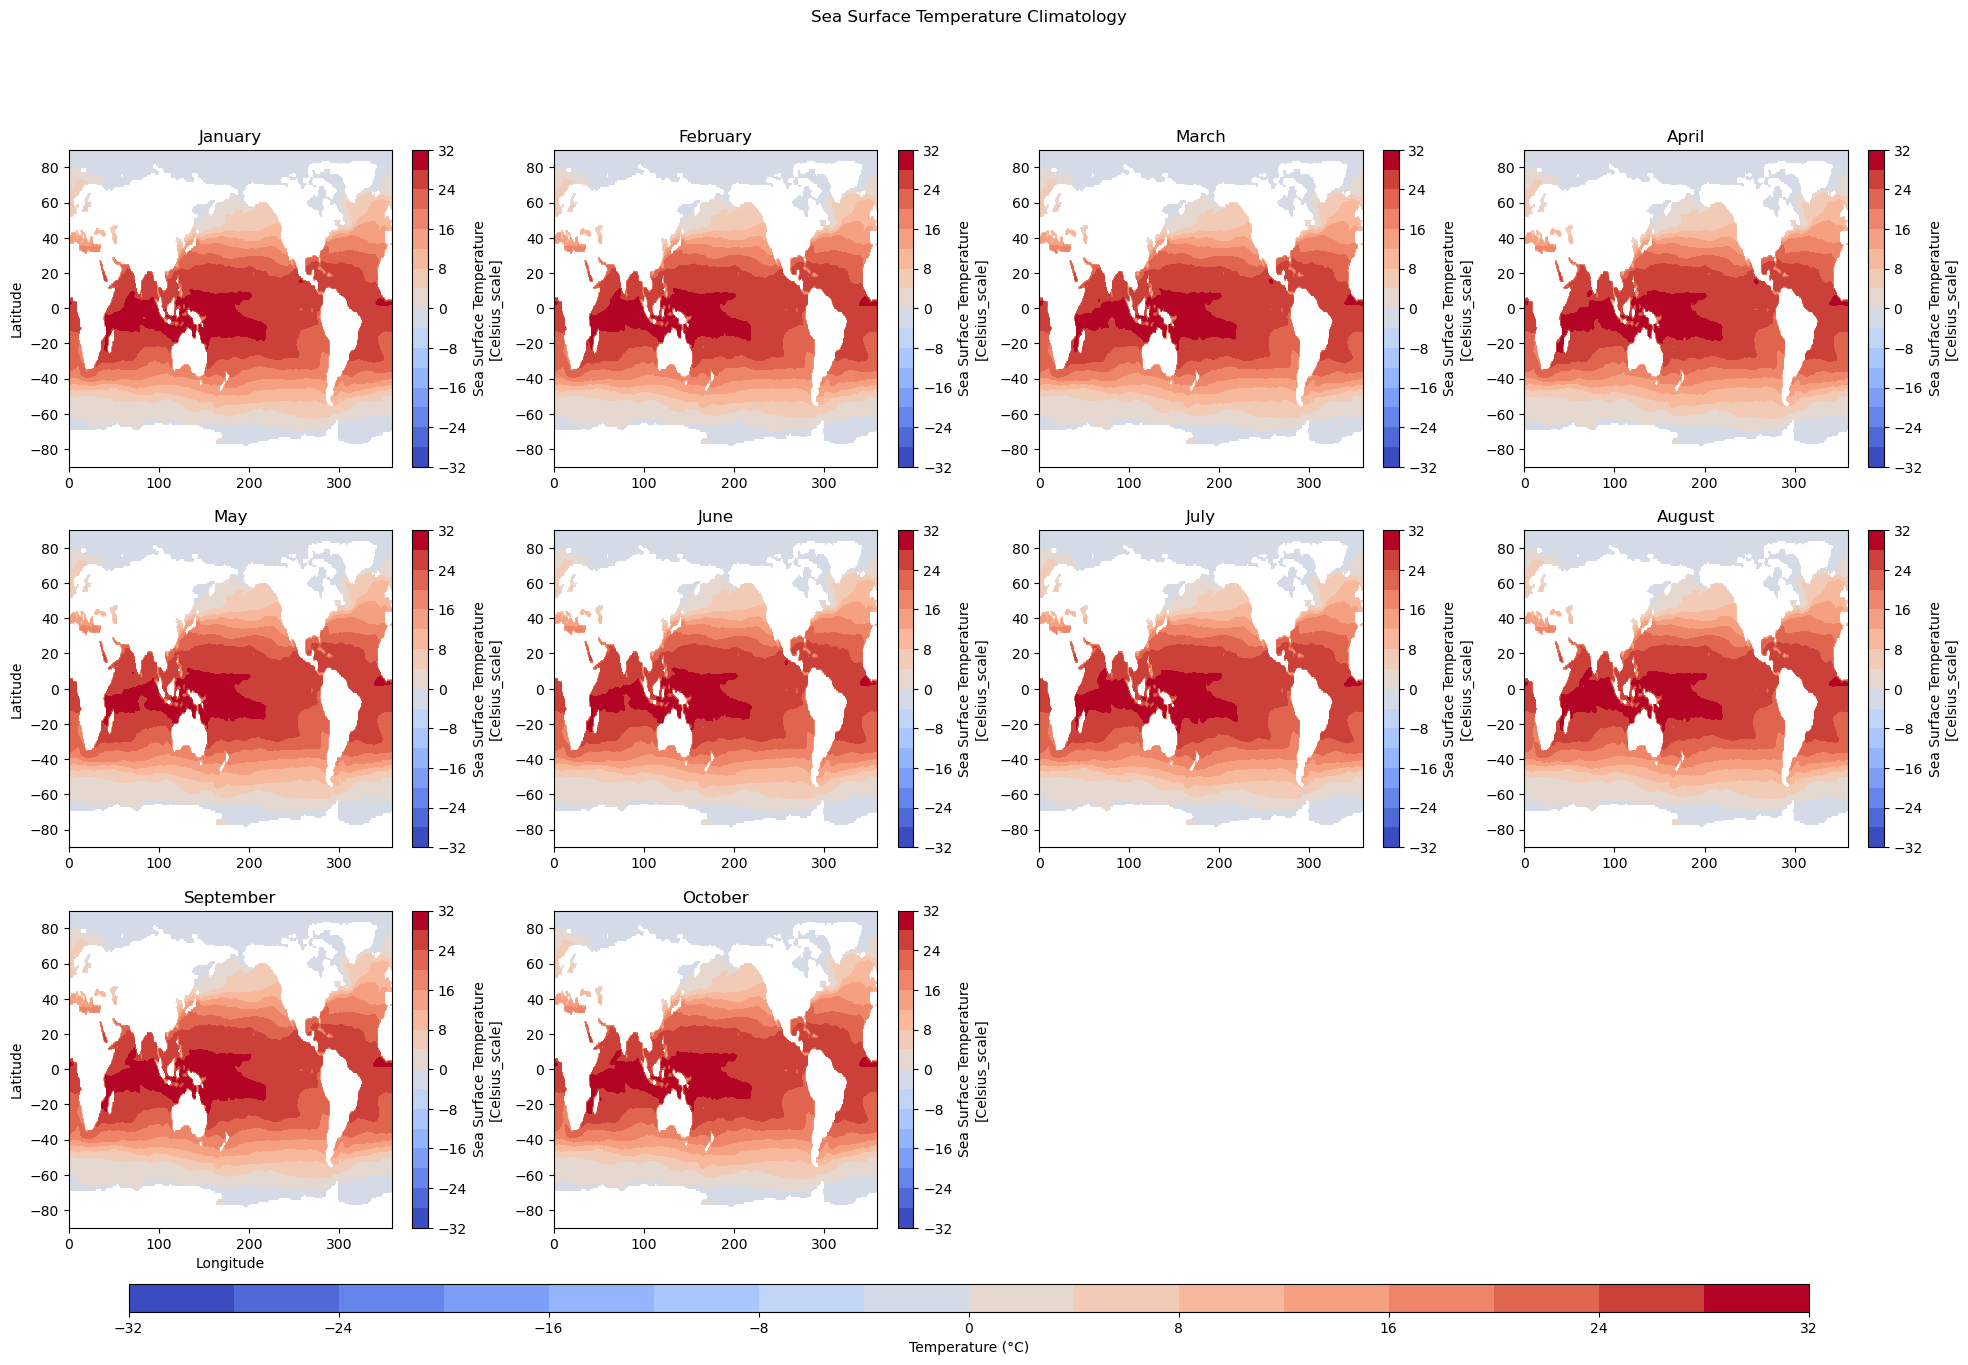

In [78]:
month_names = [calendar.month_name[i] for i in range(1, 11)]

fig, axes = plt.subplots(3, 4, figsize=(24, 14)) 
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  


data_min = ds['sst'][0, 0, :, :, :].min()
data_max = ds['sst'][0, 0, :, :, :].max()

for month in range(10):
    ax = axes[(month ) // 4, (month ) % 4]  
    sst_slice = ds['sst'][0, 0, month , :, :]
    contour = sst_slice.plot.contourf(levels=20, cmap='coolwarm', ax=ax)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('month' + str(month +1))
    ax.set_title(month_names[month])

    if month == 0 or month == 4:
        
        ax.set_title(month_names[month])

        ax.set_xlabel('')
    elif month == 9:
        
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude and Longitude')
    else:
       
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

    if month in [1, 2, 3, 5, 6, 7, 9]:
        ax.set_xlabel('')
        ax.set_ylabel('')

    if month == 9:
        ax.set_ylabel('')

for month in range(10, 12):
    fig.delaxes (axes[month // 4, month % 4])  
    
fig.suptitle('Sea Surface Temperature Climatology')

cbar = plt.colorbar(contour, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Temperature (°C)')  

plt.show()